**WHICH PLACE IS SAFER TO SETTLE IN VANCOUVER ?**

Vancouver is a coastal seaport city in western Canada, located in the Lower Mainland region of British Columbia. As the most populous city in the province, the 2016 census recorded 631,486 people in the city, up from 603,502 in 2011. The Greater Vancouver area had a population of 2,463,431 in 2016, making it the third-largest metropolitan area in Canada. Vancouver has the highest population density in Canada, with over 5,400 people per square kilometre which makes it the fifth-most densely populated city with over 250,000 residents in North America, behind New York City, Guadalajara, San Francisco, and Mexico City. Vancouver is one of the most ethnically and linguistically diverse cities in Canada: 52% of its residents are not native English speakers, 48.9% are native speakers of neither English nor French, and 50.6% of residents belong to visible minority groups.

The idea of this study is to help people planning to settle either temporarily in Vancouver by renting a house or to settle permanently by buying a house so that they would be able to choose a safer location and stay and feel safe by providing data about the safe and unsafe areas, predominant type of crime as well as the crime trend over years in various regions.

**IMPORTING LIBRARIES - I imported the required libraries for my Project**

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

To provide the stakeholders the necessary information 
1. I downloaded .csv file from https://www.kaggle.com/wosaku/crime-in-vancouver 
2. I loaded the .csv file in  https://labs.cognitiveclass.ai/tools/jupyterlab/ and run the first five rows using .head method.

In [3]:
df = pd.read_csv('crime.csv')
df.head()

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,Latitude,Longitude
0,Other Theft,2003,5,12,16.0,15.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763
1,Other Theft,2003,5,7,15.0,20.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763
2,Other Theft,2003,4,23,16.0,40.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763
3,Other Theft,2003,4,20,11.0,15.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763
4,Other Theft,2003,4,12,17.0,45.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763


**CLEANING OF DATA**

I first cleaned the data by adding a new column NeighbourhoodId by grouping .groupby method to group the neighbourhood 

In [9]:
df['NeighbourhoodID'] = df.groupby('NEIGHBOURHOOD').ngroup().add(1)
df['Incident'] = 1
df.head()

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,Latitude,Longitude,NeighbourhoodID,Incident
0,Other Theft,2003,5,12,16.0,15.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,20,1
1,Other Theft,2003,5,7,15.0,20.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,20,1
2,Other Theft,2003,4,23,16.0,40.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,20,1
3,Other Theft,2003,4,20,11.0,15.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,20,1
4,Other Theft,2003,4,12,17.0,45.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,20,1


I loaded the attribute type by .dtype method to visualize the data if integer, float, etc

In [10]:
df.dtypes

TYPE                object
YEAR                 int64
MONTH                int64
DAY                  int64
HOUR               float64
MINUTE             float64
HUNDRED_BLOCK       object
NEIGHBOURHOOD       object
X                  float64
Y                  float64
Latitude           float64
Longitude          float64
NeighbourhoodID      int64
Incident             int64
dtype: object

then, I dropped the minute column, since we are not going to check theft by every minute..I did using .drop method

df.drop(['MINUTE'], axis=1)

Then I filled the missing values of hour column using 99- a default dummy and replaced missing values of NEIGHBOURHOOD and HUNDRED_BLOCK by N/A 

In [11]:
df['HOUR'].fillna(99, inplace = True)
df['NEIGHBOURHOOD'].fillna('N/A', inplace = True)
df['HUNDRED_BLOCK'].fillna('N/A', inplace = True)

**DATA EXPLORATORY ANALYSIS**

**1. PREVALENCE OF CRIME TYPES**

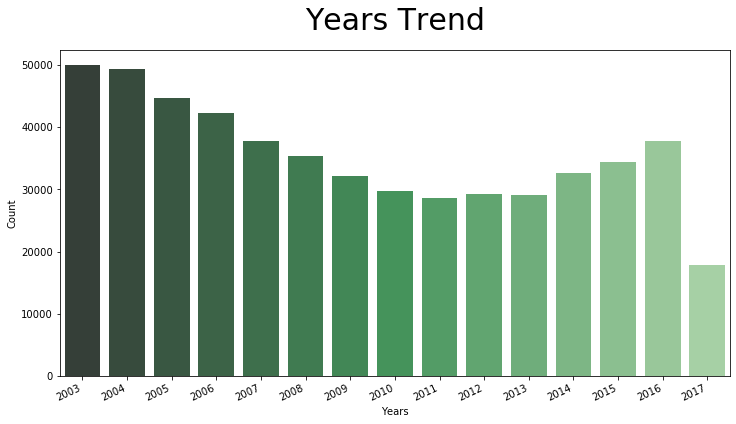

In [14]:
plt.figure(figsize=(12,6))
plt.title('Years Trend',fontdict={'fontsize':'30'},pad=20)
ax = sns.countplot(x='YEAR',data=df,palette='Greens_d')
ax.set(xlabel='Years', ylabel='Count')
plt.setp(ax.get_xticklabels(), rotation=25, horizontalalignment='right')
plt.show()

**TOP SAFE AREAS IN VANCOUVER**

In [15]:
df.groupby(['NEIGHBOURHOOD','TYPE']).count()['NeighbourhoodID'].sort_values(ascending=True).head(5)

NEIGHBOURHOOD  TYPE                                                  
Musqueam       Vehicle Collision or Pedestrian Struck (with Fatality)    1
               Other Theft                                               1
South Cambie   Vehicle Collision or Pedestrian Struck (with Fatality)    2
N/A            Break and Enter Commercial                                3
               Break and Enter Residential/Other                         3
Name: NeighbourhoodID, dtype: int64

**TOP UNSAFE AREAS IN VANCOUVER**

In [16]:
df.groupby(['NEIGHBOURHOOD','TYPE']).count()['NeighbourhoodID'].sort_values(ascending=False).head(5)

NEIGHBOURHOOD              TYPE                    
N/A                        Offence Against a Person    54142
Central Business District  Theft from Vehicle          48003
                           Other Theft                 19244
West End                   Theft from Vehicle          16904
Central Business District  Mischief                    16672
Name: NeighbourhoodID, dtype: int64

**Analysing the heatmap,**

-2010-2013 showed typically the lowest crime years.

-Crimes such as collisions-Vehicle collisions, mischief and  homicide show constant over the years.

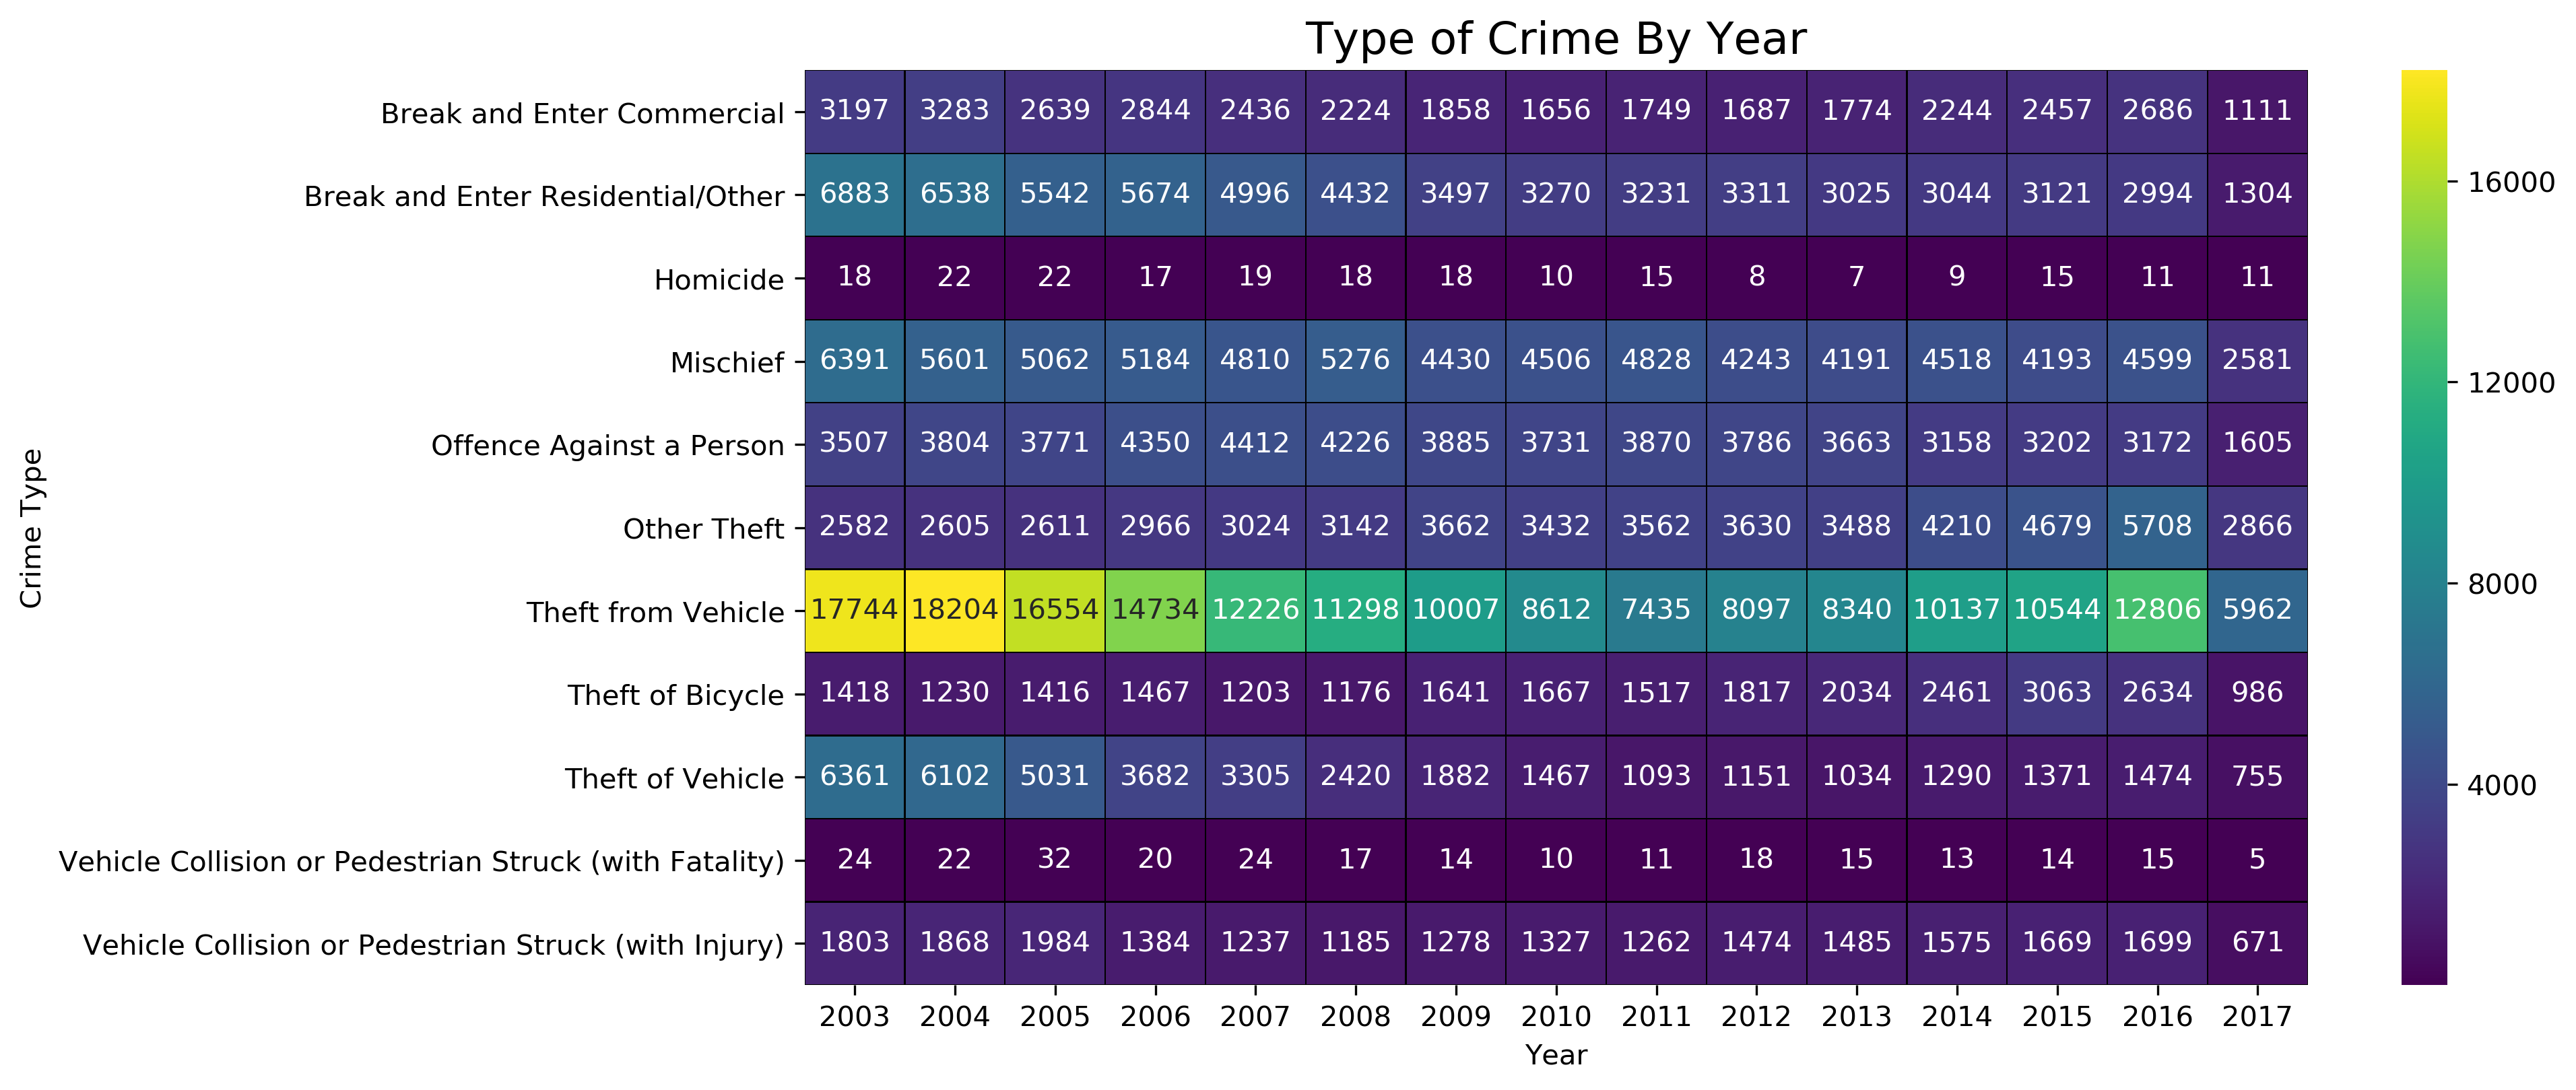

In [31]:
dfPivYear = df.pivot_table(values='Incident', index='TYPE', columns='YEAR', aggfunc=len)

fig, ax = plt.subplots(1, 1, figsize = (12, 6), dpi=300)
plt.title('Type of Crime By Year', fontsize=16)
plt.tick_params(labelsize=10)

sns.heatmap(
    dfPivYear.round(), 
    linecolor='black',
    linewidths=0.3,
    cmap='viridis', 
    annot=True, 
    fmt=".0f"
);

# Remove labels
ax.set_ylabel('Crime Type')    
ax.set_xlabel('Year')

plt.show()

**DECISION TREE CLASSIFIER**

*1. New DataFrame to filter out columns needed
  2. I have splitted the data for training and testing by 60% training and 40% testing
  3. dfRandomF['train'] = np.random.uniform(0, 1, len(dfRandomF)) <= .60*



In [32]:
dfRandomF = df
X = dfRandomF[['YEAR', 'MONTH', 'DAY','HOUR', 'NeighbourhoodID']]
Y = dfRandomF[['TYPE']]
X_train , X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.4, random_state = 5)
print('Number of observations and columns in the training data:', X_train.shape, y_train.shape)
print('Number of observations and columns in the testing data:',X_test.shape, y_test.shape)

Number of observations and columns in the training data: (318391, 5) (318391, 1)
Number of observations and columns in the testing data: (212261, 5) (212261, 1)


In [33]:
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 5,
                               max_depth=5, min_samples_leaf=8)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=8, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=5,
            splitter='best')

In [35]:
y_pred_gn = clf_gini.predict(X_test)

In [36]:
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 5,
                                    max_depth=5, min_samples_leaf=8)
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=8, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=5,
            splitter='best')

In [37]:
y_pred_en = clf_entropy.predict(X_test)

In [38]:
clf_gini.predict([[2017,1,5,15.0,12]])

array(['Theft from Vehicle'], dtype=object)

In [39]:
dfpred = df[(df['YEAR'] >= 2017)]
dfcrime = df[(df['YEAR'] < 2017)]
dfpred[(dfpred['YEAR'] == 2017) & 
        (dfpred['MONTH'] == 1) & 
        (dfpred['DAY'] == 5) & 
        (dfpred['HOUR'] == 15.0) &
        (dfpred['NeighbourhoodID'] == 12)]

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,Latitude,Longitude,NeighbourhoodID,Incident


In [40]:
dfpred[(dfpred['YEAR'] == 2017) & 
        (dfpred['MONTH'] == 1) & 
        (dfpred['DAY'] == 5) & 
        (dfpred['NeighbourhoodID'] == 12)]

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,Latitude,Longitude,NeighbourhoodID,Incident
514801,Break and Enter Residential/Other,2017,1,5,9.0,0.0,4XX E 6TH AVE,Mount Pleasant,493142.36,5456944.35,49.265223,-123.094259,12,1
514947,Theft from Vehicle,2017,1,5,21.0,30.0,1XX W 1ST AVE,Mount Pleasant,492084.79,5457519.47,49.270384,-123.108807,12,1
526353,Break and Enter Commercial,2017,1,5,5.0,45.0,2X W 7TH AVE,Mount Pleasant,492335.09,5456880.64,49.264641,-123.105353,12,1
527070,Theft from Vehicle,2017,1,5,22.0,0.0,2XX E 6TH AVE,Mount Pleasant,492791.96,5456976.73,49.265511,-123.099076,12,1
530182,Other Theft,2017,1,5,14.0,58.0,23XX CAMBIE ST,Mount Pleasant,491656.42,5456901.55,49.264820,-123.114682,12,1


In [41]:
print ('Accuracy is', accuracy_score(y_test,y_pred_gn)*100, '%')

Accuracy is 42.867507455444006 %


In [42]:
print ('Accuracy is', accuracy_score(y_test,y_pred_en)*100, '%')

Accuracy is 42.944299706493425 %


**4) RESULTS**

The study portrays majority of the crime type, and crime trend over years, also we could predict the 2017 crime using Decision Tree Classifier.
-By comparing the graphs, predominant type of crime is theft form vehicle, mischief, break and enter residential followed by others forms of crime.
-During the years 2003 and 2004, highest crime rate was reported, and then gradually crime rate went down until 2011  then again it gradually went moderately up to 2016.
the crime rate was lowest during 2017.
-Musqueum and South Cambie were the most safest places to buy houses to settle in Vancouver. 
-Central business district and Westend are the most unsafe places to buy houses to settle in Vancouver
Decision Tree Classifier gives a accuracy score of 42.86% and 42.94 % respectively.

**5) DISCUSSION**

When I started this study, I initially was planning on to use API and execute k- means clustering to find clusters of safer regions, so that it would give a clear idea of map showing a safer cluster neighbourhood. My future work would be to find the safe region  clusters. 

**6) CONCLUSION**

This report would be helpful for people planning to settle in Vancouver either temporarily for rent or for permanently settle in Vancouver by buying a house, by comparing the type of crimes in various locations, safe and unsafe areas, and crime trend.  However, it would be necessary to analyze all variables such as cost of the house, size, rent amount, nearby grocery stores etc. Thus, further exploration is required.
